# 2022.09.01.(목) 과제

1. 회귀(Regression)
    - Dataset : NYC_taxi.csv
    - 거리에 따른 택시요금 예측
    - 조건) 뉴욕시 내에서 승차/하차 경우만
2. 분류(Classification)
    - Dataset : diabete.csv
    -
---

In [241]:
# 모듈 설치
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [242]:
# 파일 불러오기
df = pd.read_csv('./train.csv', nrows=50000, parse_dates = ['pickup_datetime'])

In [243]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [244]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [245]:
x1 = df['pickup_longitude']
y1 = df['pickup_latitude']
x2 = df['dropoff_longitude']
y2 = df['dropoff_latitude']
df['distance'] = ((x2-x1)**2 + (y2-y1)**2)**(1/2)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


In [246]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,0.045782
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.008049
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,0.020574
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.007686


In [247]:
def clean(df: pd.DataFrame, C_name: str):
    Q3 = df[C_name].quantile(0.75)
    Q1 = df[C_name].quantile(0.25)
    IQR = Q3 - Q1
    df = df[(df[C_name] < Q3 + 1.5 * IQR )] 
    df = df[(df[C_name] > Q1 - 1.5 * IQR )]
    return df



In [248]:
df_clean1 = clean(df,'fare_amount') 
df_final = clean(df_clean1,'distance')


In [249]:
Q1 - 1.5 * IQR

-4.350000000000001

In [250]:
# 뉴욕시만 한정
df = df[(df["pickup_longitude"] <= -71.47) & (df["pickup_longitude"] >= -79.45)]
df = df[(df["pickup_latitude"] >= 40.29) & (df["pickup_latitude"] <= 45)]
df = df[(df["dropoff_longitude"] <= -71.47) & (df["dropoff_longitude"] >= -79.45)]
df = df[(df["dropoff_latitude"] >= 40.29) & (df["dropoff_latitude"] <= 45)]

df = df[df['fare_amount'] > 0]
df = df[df['distance'] > 0]
df = df[df['passenger_count'] >= 1]

df_clean1 = clean(df,'fare_amount') 
df_final = clean(df_clean1,'distance')


In [251]:
df_final

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,0.038675
...,...,...,...,...,...,...,...,...,...
49994,2012-10-13 19:57:00.000000161,8.5,2012-10-13 19:57:00+00:00,-73.976212,40.744832,-73.981567,40.724635,1,0.020895
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,0.045782
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.008049
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,0.020574


In [252]:
# 2차 배열로 변환
distance = np.array(df_final['distance']).reshape(-1,1)
fare_amount = np.array(df_final['fare_amount']).reshape(-1,1)

In [253]:
# train, test 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(distance, fare_amount,random_state=43)

## 이상치 처리 후 score
---

In [254]:
# 요금 예측 모델
model = LinearRegression()
model.fit(train_input, train_target)

print('이상치 처리 후 train score:',model.score(train_input, train_target))
print('이상치 처리 후 test score:',model.score(test_input, test_target))

이상치 처리 후 train score: 0.6427382467135285
이상치 처리 후 test score: 0.634231644959244


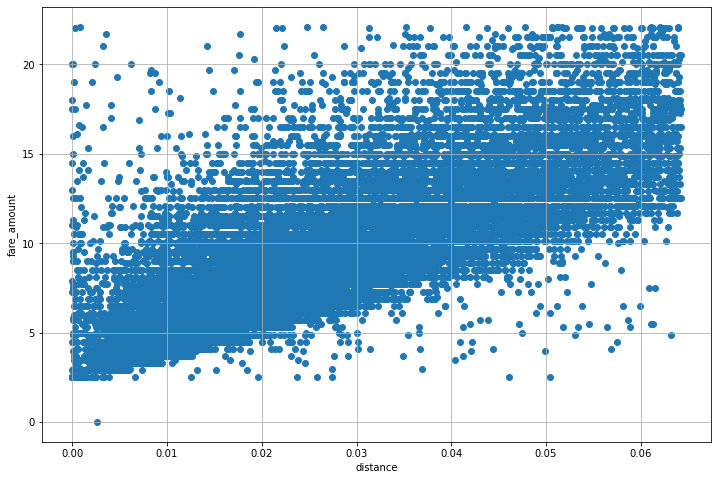

In [255]:
plt.figure(figsize=(12,8))
plt.scatter(train_input, train_target)
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.grid()
plt.show()

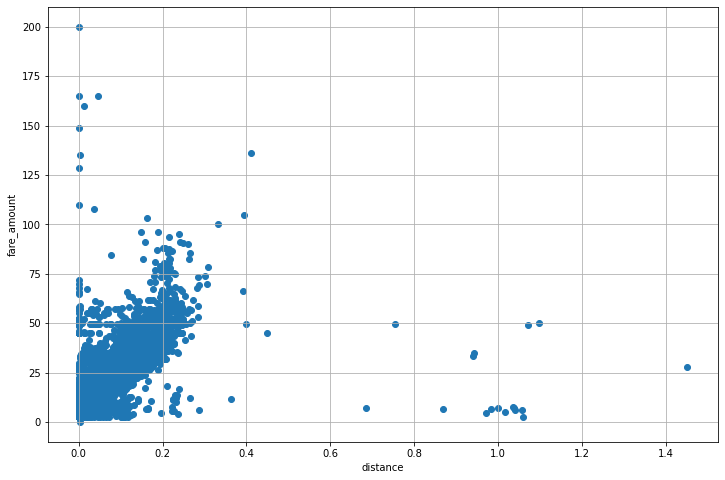

In [256]:
plt.figure(figsize=(12,8))
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.grid()
plt.show()

## 원본 데이터 score
---

0.6599124112687752
0.5519881975044947


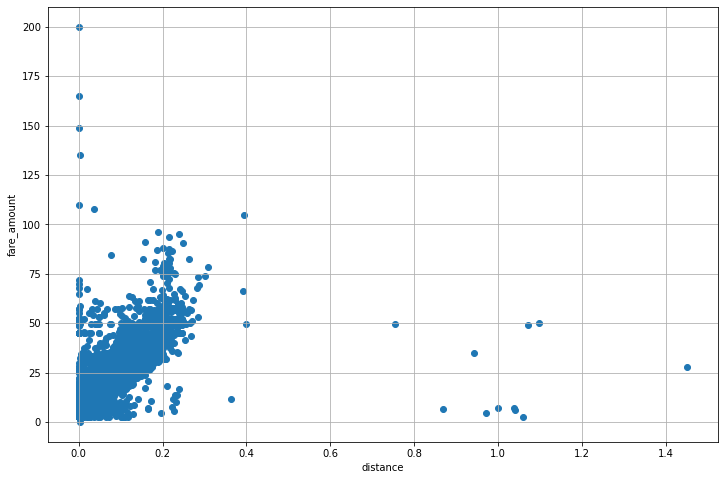

In [257]:
# 파일 불러오기
df = pd.read_csv('./train.csv', nrows=50000, parse_dates = ['pickup_datetime'])

x1 = df['pickup_longitude']
y1 = df['pickup_latitude']
x2 = df['dropoff_longitude']
y2 = df['dropoff_latitude']
df['distance'] = ((x2-x1)**2 + (y2-y1)**2)**(1/2)

df = df[(df["pickup_longitude"] <= -71.47) & (df["pickup_longitude"] >= -79.45)]
df = df[(df["pickup_latitude"] >= 40.29) & (df["pickup_latitude"] <= 45)]
df = df[(df["dropoff_longitude"] <= -71.47) & (df["dropoff_longitude"] >= -79.45)]
df = df[(df["dropoff_latitude"] >= 40.29) & (df["dropoff_latitude"] <= 45)]

df = df[df['fare_amount'] > 0]
df = df[df['distance'] > 0]
df = df[df['passenger_count'] >= 1]

# 2차 배열로 변환
distance = np.array(df['distance']).reshape(-1,1)
fare_amount = np.array(df['fare_amount']).reshape(-1,1)

# train, test 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(distance, fare_amount,random_state=43)

# 요금 예측 모델
model = LinearRegression()
model.fit(train_input, train_target)
print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

plt.figure(figsize=(12,8))
plt.scatter(train_input, train_target)
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.grid()
plt.show()

## 2. 당뇨 로지스틱 회귀 분석
---

In [258]:
from distutils.errors import PreprocessError


df = pd.read_csv('./diabetes.csv')

corr = df.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [259]:
# 모듈설치
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

data = df[['Pregnancies' , 'Glucose', 'BMI','Age']]
target = df['Outcome']

arr_data = np.array(data)
arr_target =np.array(target)

print(arr_data.shape)
print(arr_target.shape)

# train,test 나누기 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split( arr_data, arr_target, test_size= 0.2,stratify = target, random_state=42)

model = LogisticRegression()
model.fit(train_input,train_target)

# 학습 후 설정된 속성
print("분류 종류 : ", model.classes_)
print("가중치 값 : \n", model.coef_)
print("절  편 값 : ", model.intercept_)
print("특성 갯수 : ", model.n_features_in_)

print('trainset 점수:', model.score(train_input,train_target))
print('testset 점수 :' ,model.score(test_input,test_target))

(768, 4)
(768,)
분류 종류 :  [0 1]
가중치 값 : 
 [[0.10483384 0.03509689 0.09108397 0.01417272]]
절  편 값 :  [-8.90519412]
특성 갯수 :  4
trainset 점수: 0.7833876221498371
testset 점수 : 0.7077922077922078
